**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Armando Cerda De La Rosa
*   MATRÍCULA: A01570376   

---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [1]:
import pandas as pd

air_df = pd.read_csv('LaqnData.csv')

In [2]:
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [3]:
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [4]:
air_df.shape

(43800, 6)

In [5]:
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [6]:
air_df.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [7]:
import random
ex1, ex2, ex3 = random.sample(range(len(air_df)), 3)

print("Dataframe total rows: ", len(air_df))
df_info = pd.DataFrame(data = air_df.dtypes)
missing_values_total = air_df.isnull().sum()
missing_values_percent = round(missing_values_total/len(air_df)*100,2).astype(str)+" %"

pd.concat([df_info[0].rename("Data Type"),\
           air_df.T[ex1].rename("Example 1"),\
           air_df.T[ex2].rename("Example 2"),\
           air_df.T[ex3].rename("Example 3"),\
           missing_values_total.rename("Total Not Missing"), \
           missing_values_percent.rename("% of missing values")], axis=1)

Dataframe total rows:  43800


,Data Type,Example 1,Example 2,Example 3,Total Not Missing,% of missing values
Site,object,CT3,CT3,CT3,0,0.0 %
Species,object,PM10,NOX,PM10,0,0.0 %
ReadingDateTime,object,09/04/2017 01:00,27/04/2017 10:00,28/02/2017 19:00,0,0.0 %
Value,float64,66.3,89.6,23.3,3230,7.37 %
Units,object,ug/m3,ug m-3 as NO2,ug/m3,0,0.0 %
Provisional or Ratified,object,R,R,R,0,0.0 %


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [8]:
# Cuántas mediciones se hicieron?
print(f"Cantidad de mediciones: {air_df['ReadingDateTime'].nunique()}")

# Cuántos contaminantes del aire (`Species`) se analizaron?
print(f"Número de contaminantes analizados: {air_df['Species'].nunique()}")

# Qué columnas no agregan ningún valor informativo? las de un conteo único de 1.
valores_unicos_por_columna = air_df.nunique()
columnas_a_borrar = valores_unicos_por_columna[valores_unicos_por_columna == 1].index.tolist()
print(f"Columnas no informativas: {columnas_a_borrar}")

# Eliminar esas columnas del dataframe
air_df = air_df.drop(columns=columnas_a_borrar)

Cantidad de mediciones: 8760
Número de contaminantes analizados: 5
Columnas no informativas: ['Site', 'Provisional or Ratified']


In [9]:
# La columna `Units` tampoco tiene valor informativo.
# las unidades son las mismas
unidades_unicas = air_df['Units'].unique()
print(f"Valores únicos en la columna 'Units': {unidades_unicas}")

air_df = air_df.drop(columns='Units')

print(air_df.head())

Valores únicos en la columna 'Units': ['ug m-3' 'ug m-3 as NO2' 'ug/m3']
  Species   ReadingDateTime  Value
0      NO  01/01/2017 00:00    3.5
1      NO  01/01/2017 01:00    3.6
2      NO  01/01/2017 02:00    2.2
3      NO  01/01/2017 03:00    2.1
4      NO  01/01/2017 04:00    3.3


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [10]:
air_df["Species"].value_counts()
# Sí coincice con el total de mediciones

Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: count, dtype: int64

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [11]:
air_df.groupby("Species").mean("Value")

,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [12]:
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [13]:
desc = pvt_df.describe()
desc

Species,NO,NO2,NOX,PM10,PM2.5
count,8660.000000,8660.000000,8660.000000,8657.000000,5933.000000
mean,15.045115,38.010185,61.078661,22.551704,14.999831
std,26.678565,18.580841,54.584805,15.344755,13.558588
min,-2.000000,2.800000,1.000000,-5.600000,-8.000000
25%,3.100000,23.800000,30.300000,13.900000,7.000000
50%,7.100000,35.300000,46.900000,19.500000,11.000000
75%,15.500000,49.900000,73.800000,27.300000,18.000000
max,401.799990,120.200000,734.299990,633.099980,128.000000


In [14]:
# Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
max_no2 = desc.loc['max', 'NO2']
print(f"El mayor valor de NO2 registrado es {max_no2} el {pvt_df[pvt_df['NO2'] == max_no2].index[0]}")

El mayor valor de NO2 registrado es 120.2 el 24/01/2017 19:00


In [15]:
# Cuál es el menor valor de `PM10` registrado? ¿A qué día pertenece?
min_pm10 = desc.loc['min', 'PM10']
print(f"El menor valor de PM10 registrado es {min_pm10} y pertenece al día {pvt_df[pvt_df['PM10'] == min_pm10].index[0]}")

El menor valor de PM10 registrado es -5.6 y pertenece al día 12/09/2017 23:00


In [16]:
# Cuál es la mediana del `NO`? ¿Cómo se interpreta?
median_no = desc.loc['50%', 'NO']
print(f"""La mediana de NO es {median_no}.
          Interpretación: 
          50% de las mediciones son inferiores  a {median_no} y el 50% restante son superiores a {median_no}.""")

La mediana de NO es 7.1.
          Interpretación: 
          50% de las mediciones son inferiores  a 7.1 y el 50% restante son superiores a 7.1.


In [17]:
# Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?
q1_pm25 = desc.loc['25%', 'PM2.5']
print(f"""El primer cuartil de PM2.5 es {q1_pm25}.
          Interpretación: 
          {q1_pm25} es el valor por debajo del cual se encuentra el 25% de los datos.
          """)



El primer cuartil de PM2.5 es 7.0.
          Interpretación: 
          7.0 es el valor por debajo del cual se encuentra el 25% de los datos.
          


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

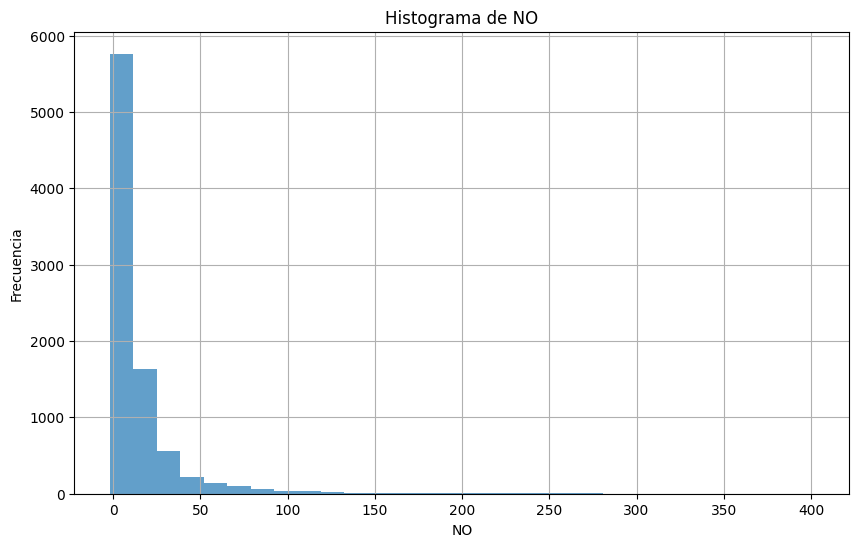

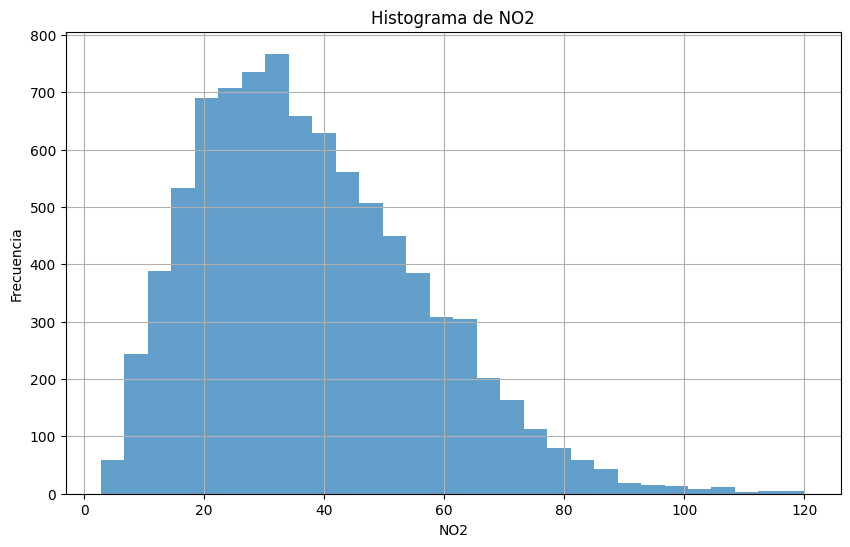

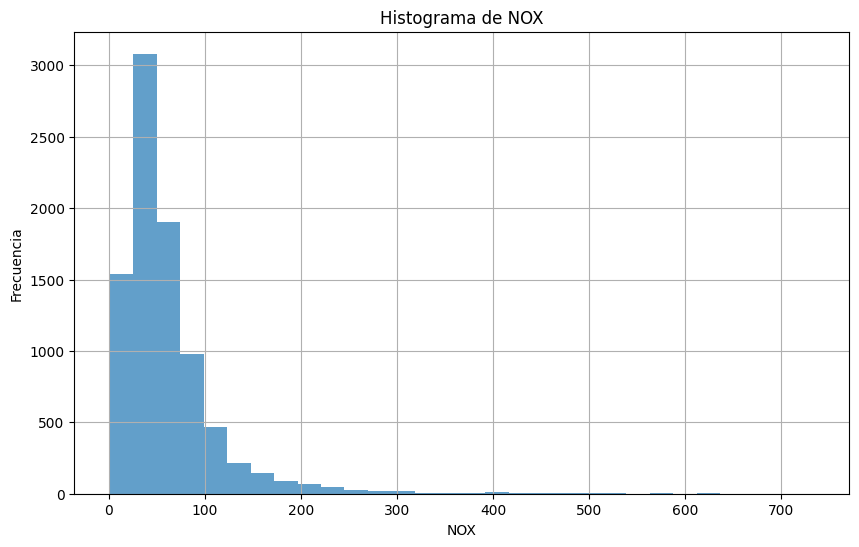

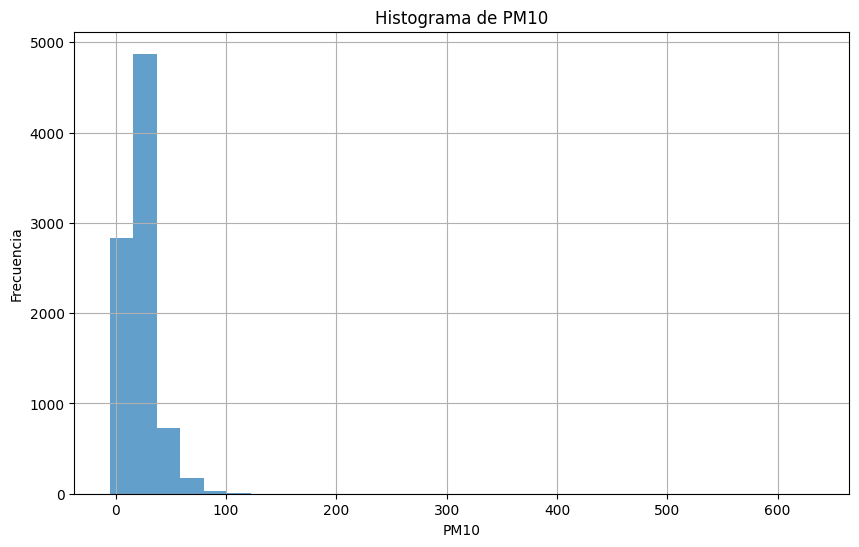

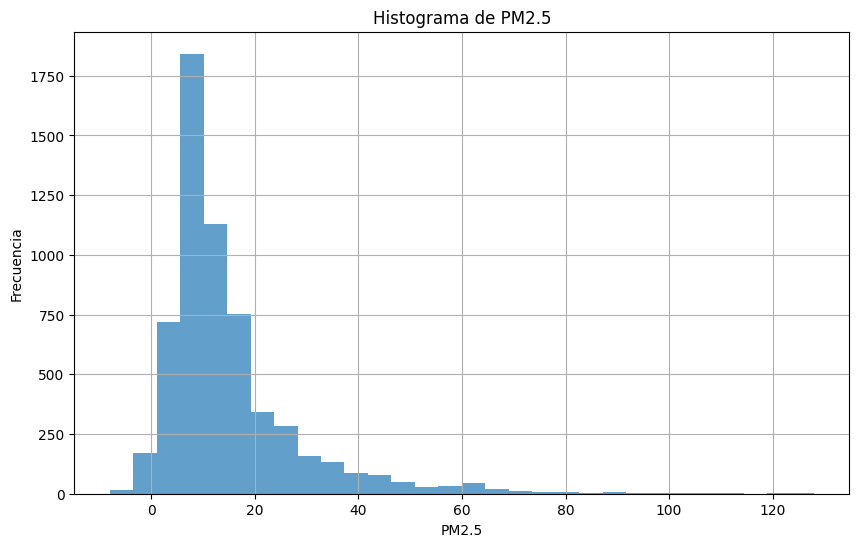

In [18]:
import matplotlib.pyplot as plt

for col in pvt_df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(pvt_df[col].dropna(), bins=30, alpha=0.7) 
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

In [19]:
std = pvt_df.std()
contaminant = std.idxmax()

print(f"El contaminante con  mayor variabilidad es {contaminant} con una dev std de {std[contaminant]}")

El contaminante con  mayor variabilidad es NOX con una dev std de 54.584805082983586


8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [20]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True) # SPLTIS THE DATETIME COLUMN INTO TWO COLUMNS (DATE AND TIME)
datetime_df.columns = ['Date','Time'] # RENAMES THE COLUMNS
date_df = datetime_df.Date.str.split('/',expand=True) # SPLITS THE DATE COLUMN INTO THREE COLUMNS (DAY, MONTH, YEAR)
date_df.columns = ['Day','Month','Year']  # RENAMES THE COLUMNS

air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year']) # JOINS THE NEW COLUMNS TO THE DATAFRAME AND DROPS THE ORIGINAL COLUMN
air_df = air_df.set_index(['Month','Day','Time','Species']) # SETS THE INDEX TO THE NEW COLUMNS
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [21]:
air_df.unstack()

print("No son iguales una está pivoteada y la otra no, la anterior tiene una fila de Species y la otra tiene columnas apra cada especie, volviendolo más legible. La información es la misma.")

No son iguales una está pivoteada y la otra no, la anterior tiene una fila de Species y la otra tiene columnas apra cada especie, volviendolo más legible. La información es la misma.


10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

In [22]:
# Melt y Pivot funcionan en el dataframe cambiando entre formato largo y ancho, mientras que stack y unstack  funcionan en series y dataframes con multiples indices.
# Melt convierte un df de ancho a largo. Un Pivot convierte un df de largo a ancho.
# Stack apila las columnas de un DF moviendolas al indice y Unstack desapila los indices a columnas.

# La contra parte de melt sería stack  y la de pivot sería unstack..